In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import copy

from modules import get_bandpass_dict, Sed

In [117]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

In [9]:
bandpass_dict = get_bandpass_dict()

In [110]:
templates = ['El_B2004a', 'Sbc_B2004a', 'Scd_B2004a', 'Im_B2004a', 'SB3_B2004a', 
                'SB2_B2004a', 'ssp_25Myr_z008', 'ssp_5Myr_z008']

for i in range(1,21):
    templates.append('naive'+str(i))

X = []
for template in templates:
    name = 'templates/'+template+'.sed'
    x,y = np.loadtxt(name,unpack=True)

    sed = Sed()
    sed.wavelen = x
    sed.flambda = y
    
    sed.flambda = np.interp(np.linspace(10,23500,100),x,y)
    
    X.append(sed.flambda)
    
X = np.array(X)

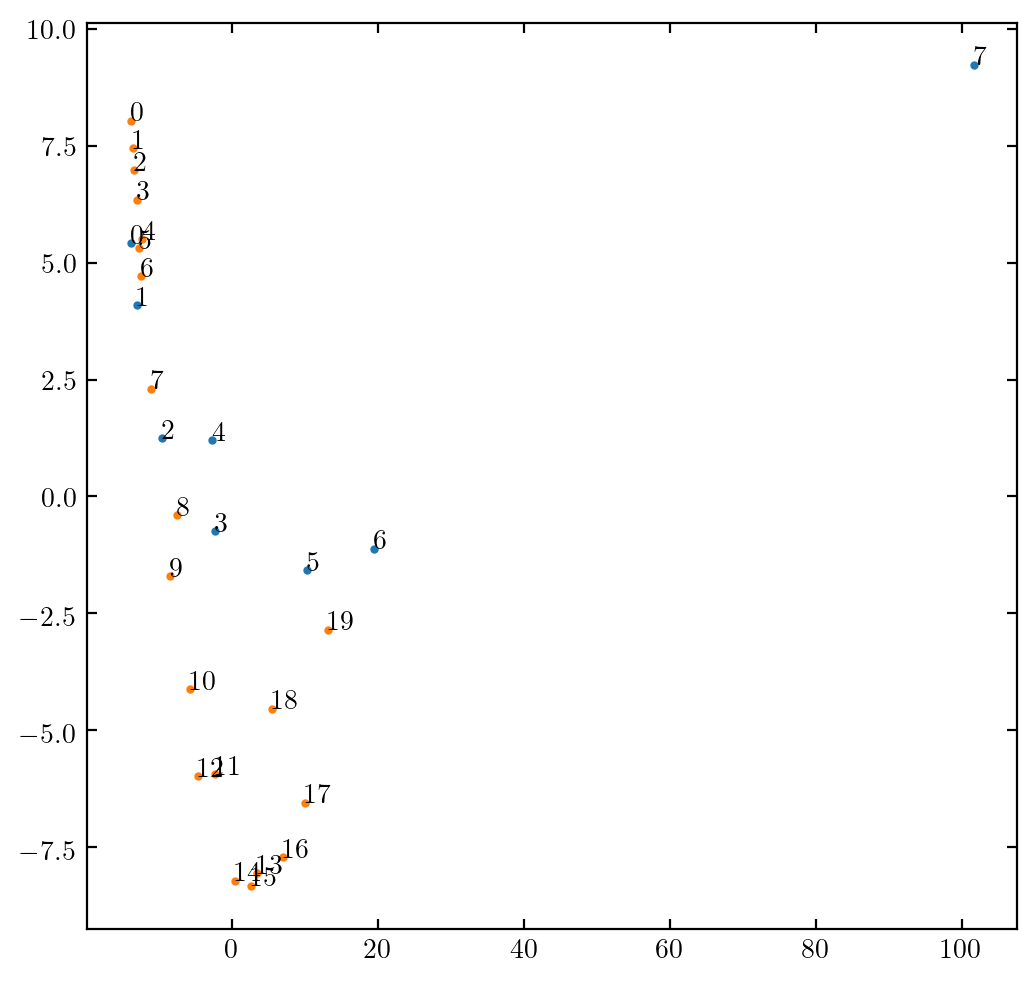

In [121]:
fig,ax = plt.subplots(figsize=(6,6))
pca = PCA(n_components=2)
pca.fit(X)

Y = pca.transform(X)

for i in range(28):
    j = i
    if i < 8:
        c = 'C0'
    else:
        c = 'C1'
        j -= 8
        
    plt.scatter(Y[i,0],Y[i,1],c=c)
    plt.annotate(j,(Y[i,0],Y[i,1]))